<a href="https://colab.research.google.com/github/WeslleyRSantos/HadoopAula/blob/main/Hadoop_Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Pasta onde vamos guardar o dataset (cria se não existir)
DATA_DRIVE_PATH = "/content/drive/MyDrive/data_labs/"
!mkdir -p "$DATA_DRIVE_PATH"
print(f"Pasta de trabalho: {DATA_DRIVE_PATH}")


Pasta de trabalho: /content/drive/MyDrive/data_labs/


In [6]:
# URL do dataset “Online Retail” (arquivo .xlsx → vamos converter para CSV)
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

# Baixar o arquivo .xlsx
!wget -q -O "$DATA_DRIVE_PATH/online_retail.xlsx" "$URL"

# Converter para CSV usando pandas (mais fácil que instalar xlrd)
import pandas as pd
xlsx_path = f"{DATA_DRIVE_PATH}online_retail.xlsx"
csv_path  = f"{DATA_DRIVE_PATH}online_retail.csv"

df = pd.read_excel(xlsx_path)
df.to_csv(csv_path, index=False, encoding="utf-8")
print("✅ Dataset convertido para CSV")
print("Primeiras linhas:")
print(df.head())


✅ Dataset convertido para CSV
Primeiras linhas:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [7]:
import os, subprocess, sys

# 4.1 – Detectar JAVA_HOME
java_home_res = subprocess.run(['update-alternatives', '--query', 'java'],
                               capture_output=True, text=True)
java_path = java_home_res.stdout.split('Best: ')[1].split('\n')[0]
java_home = os.path.dirname(os.path.dirname(java_path))
os.environ["JAVA_HOME"] = java_home
os.environ["HADOOP_HOME"] = "/content/hadoop-3.2.1"
os.environ["PATH"] += f":/content/hadoop-3.2.1/bin:/content/hadoop-3.2.1/sbin"

print(f"JAVA_HOME = {java_home}")
print("✅ Variáveis de ambiente configuradas")


JAVA_HOME = /usr/lib/jvm/java-17-openjdk-amd64
✅ Variáveis de ambiente configuradas


In [8]:
# 4.2 – Baixar e descompactar Hadoop (se ainda não existir)
if not os.path.isdir("/content/hadoop-3.2.1"):
    !wget -q https://archive.apache.org/dist/hadoop/common/hadoop-3.2.1/hadoop-3.2.1.tar.gz
    !tar -xzf hadoop-3.2.1.tar.gz -C /content/
    !ln -sf /content/hadoop-3.2.1/bin/* /usr/bin/ 2>/dev/null
    !ln -sf /content/hadoop-3.2.1/sbin/* /usr/bin/ 2>/dev/null
    print("✅ Hadoop baixado e instalado")
else:
    print("✅ Hadoop já está instalado")


✅ Hadoop baixado e instalado


In [9]:
# 4.3 – Configurações XML (core‑site e hdfs‑site)
core_xml = """<?xml version="1.0"?>
<configuration>
  <property><name>fs.defaultFS</name><value>hdfs://localhost:9000</value></property>
</configuration>"""
with open("/content/hadoop-3.2.1/etc/hadoop/core-site.xml","w") as f: f.write(core_xml)

hdfs_xml = """<?xml version="1.0"?>
<configuration>
  <property><name>dfs.replication</name><value>1</value></property>
  <property><name>dfs.namenode.name.dir</name><value>/content/hadoop_data/namenode</value></property>
  <property><name>dfs.datanode.data.dir</name><value>/content/hadoop_data/datanode</value></property>
</configuration>"""
with open("/content/hadoop-3.2.1/etc/hadoop/hdfs-site.xml","w") as f: f.write(hdfs_xml)

# hadoop‑env.sh → inserir JAVA_HOME
env_path = "/content/hadoop-3.2.1/etc/hadoop/hadoop-env.sh"
with open(env_path,"r") as f: txt = f.read()
if "export JAVA_HOME" not in txt:
    txt += f"\nexport JAVA_HOME={java_home}\n"
with open(env_path,"w") as f: f.write(txt)

# criar diretórios de dados
!mkdir -p /content/hadoop_data/namenode
!mkdir -p /content/hadoop_data/datanode
print("✅ Configurações Hadoop prontas")


✅ Configurações Hadoop prontas


In [10]:
# 4.4 – Formatar NameNode (executa só uma vez)
!export JAVA_HOME=$JAVA_HOME && /content/hadoop-3.2.1/bin/hdfs namenode -format -force
print("✅ NameNode formatado")


2026-02-13 17:29:36,759 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = bf3685af7eb3/172.28.0.12
STARTUP_MSG:   args = [-format, -force]
STARTUP_MSG:   version = 3.2.1
STARTUP_MSG:   classpath = /content/hadoop-3.2.1/etc/hadoop:/content/hadoop-3.2.1/share/hadoop/common/lib/jul-to-slf4j-1.7.25.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jersey-servlet-1.19.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/kerb-core-1.0.1.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jettison-1.1.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jetty-xml-9.3.24.v20180605.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/kerb-admin-1.0.1.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jetty-io-9.3.24.v20180605.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/hadoop-auth-3.2.1.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/dnsjava-2.1.7.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/

In [11]:
# 4.5 – Iniciar HDFS (NameNode, DataNode, SecondaryNameNode)
%%bash
set -e
export JAVA_HOME=$JAVA_HOME
export HADOOP_HOME=/content/hadoop-3.2.1
export PATH=$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin

$HADOOP_HOME/bin/hdfs --daemon start namenode
$HADOOP_HOME/bin/hdfs --daemon start datanode
$HADOOP_HOME/bin/hdfs --daemon start secondarynamenode

jps   # mostra processos ativos
echo "✅ HDFS rodando"


2866 DataNode
2972 Jps
2925 SecondaryNameNode
2799 NameNode
✅ HDFS rodando


In [17]:
# Cria diretório no HDFS para o dataset
!export JAVA_HOME=$JAVA_HOME && hdfs dfs -mkdir -p /user/ecommerce/datasets

# Copia o arquivo do Drive para uma pasta temporária local (para o HDFS conseguir acessar)
!cp "$csv_path" /tmp/online_retail.csv

# Copia o arquivo que está na pasta temporária local para o HDFS
!export JAVA_HOME=$JAVA_HOME && hdfs dfs -put -f /tmp/online_retail.csv /user/ecommerce/datasets/online_retail.csv

print("✅ CSV enviado ao HDFS")

2026-02-13 17:32:35,383 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
✅ CSV enviado ao HDFS


In [13]:
%%bash
set -e
cat > /content/mapper_categoria.py << 'PY'
#!/usr/bin/env python3
import sys, csv

reader = csv.DictReader(sys.stdin)

for row in reader:
    # Usa a primeira palavra da coluna Description como “categoria”
    descricao = row["Description"].strip()
    if not descricao:
        continue
    categoria = descricao.split()[0]          # primeira palavra
    # preço total = Quantity * UnitPrice
    try:
        qty = float(row["Quantity"])
        price = float(row["UnitPrice"])
        total = qty * price
    except:
        continue
    print(f"{categoria}\t{total}")
PY
chmod +x /content/mapper_categoria.py
echo "✅ Mapper criado"


✅ Mapper criado


In [14]:
%%bash
set -e
cat > /content/reducer_soma.py << 'PY'
#!/usr/bin/env python3
import sys

cur = None
acc = 0.0
for line in sys.stdin:
    key, val = line.rstrip("\n").split("\t", 1)
    v = float(val)
    if cur is None:
        cur = key
    if key != cur:
        print(f"{cur}\t{acc:.2f}")
        cur = key
        acc = 0.0
    acc += v
if cur is not None:
    print(f"{cur}\t{acc:.2f}")
PY
chmod +x /content/reducer_soma.py
echo "✅ Reducer criado"


✅ Reducer criado


In [18]:
%%bash
set +e
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"
export STREAMING_JAR="$(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar | head -n 1)"

OUT="/user/ecommerce/output/faturamento_categoria"
hdfs dfs -rm -r -f "$OUT" >/dev/null 2>&1 || true

hadoop jar "$STREAMING_JAR" \
  -D mapreduce.job.name="faturamento_categoria" \
  -input  /user/ecommerce/datasets/online_retail.csv \
  -output "$OUT" \
  -mapper  /content/mapper_categoria.py \
  -reducer /content/reducer_soma.py \
  -file /content/mapper_categoria.py \
  -file /content/reducer_soma.py \
  2>&1 | tail -n 30

EC=${PIPESTATUS[0]}
echo ""
echo "EXIT_CODE=$EC"

if [ "$EC" -eq 0 ]; then
  echo "=== TOP 5 CATEGORIAS POR FATURAMENTO ==="
  hdfs dfs -text "$OUT/part-00000" | awk -F'\t' '{print $2"\t"$1}' | sort -nr | head -n 5
else
  echo "❌ Job falhou – verifique os logs acima"
fi


	Map-Reduce Framework
		Map input records=541910
		Map output records=540455
		Map output bytes=7392619
		Map output materialized bytes=8473535
		Input split bytes=115
		Combine input records=0
		Combine output records=0
		Reduce input groups=964
		Reduce shuffle bytes=8473535
		Reduce input records=540455
		Reduce output records=964
		Spilled Records=1080910
		Shuffled Maps =1
		Failed Shuffles=0
		Merged Map outputs=1
		GC time elapsed (ms)=41
		Total committed heap usage (bytes)=461373440
	Shuffle Errors
		BAD_ID=0
		CONNECTION=0
		IO_ERROR=0
		WRONG_LENGTH=0
		WRONG_MAP=0
		WRONG_REDUCE=0
	File Input Format Counters 
		Bytes Read=48039726
	File Output Format Counters 
		Bytes Written=14120
2026-02-13 17:33:12,540 INFO streaming.StreamJob: Output directory: /user/ecommerce/output/faturamento_categoria

EXIT_CODE=0
=== TOP 5 CATEGORIAS POR FATURAMENTO ===
606080.39	SET
574096.96	JUMBO
386758.98	RED
316838.29	DOORMAT
267021.25	LUNCH


2026-02-13 17:33:16,689 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false


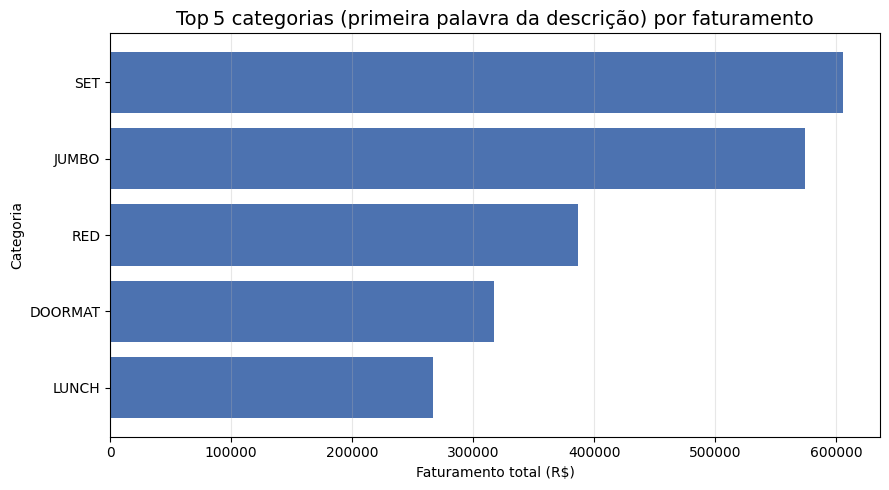


📊 Tabela dos 5 maiores
categoria  faturamento
      SET    606080.39
    JUMBO    574096.96
      RED    386758.98
  DOORMAT    316838.29
    LUNCH    267021.25


In [19]:
import pandas as pd, subprocess, io
from matplotlib import pyplot as plt

OUT = "/user/ecommerce/output/faturamento_categoria/part-00000"
txt = subprocess.check_output(["hdfs","dfs","-text",OUT], text=True)

df = pd.read_csv(io.StringIO(txt), sep="\t", header=None,
                 names=["categoria","faturamento"])
df["faturamento"] = pd.to_numeric(df["faturamento"], errors="coerce")

top5 = df.sort_values("faturamento", ascending=False).head(5)

plt.figure(figsize=(9,5))
plt.barh(top5["categoria"][::-1], top5["faturamento"][::-1], color="#4c72b0")
plt.title("Top 5 categorias (primeira palavra da descrição) por faturamento", fontsize=14)
plt.xlabel("Faturamento total (R$)")
plt.ylabel("Categoria")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Tabela dos 5 maiores")
print(top5.to_string(index=False))
